In [97]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch

In [98]:
### Preparing data

In [99]:
dataset, target = load_breast_cancer(return_X_y=True,
                                  as_frame=True)

In [100]:
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [101]:
target # 0-malignant, 1- beningn

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int64

In [102]:
count_malignant=0
for key, value in target.items():
    if value == 0:
        count_malignant+=1

count_malignant

212

<Figure size 2000x1500 with 0 Axes>

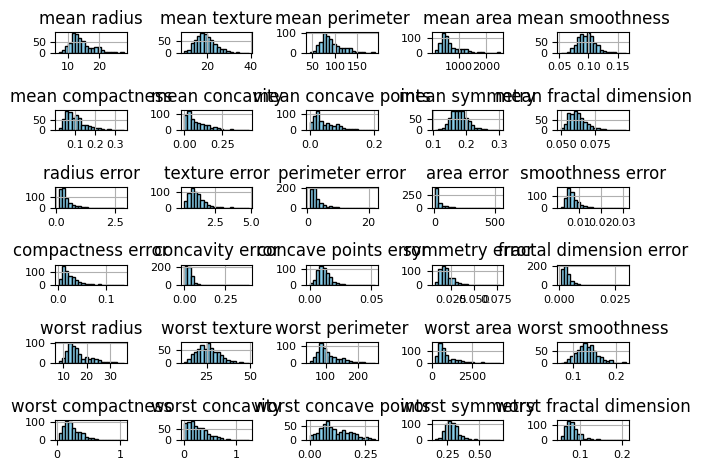

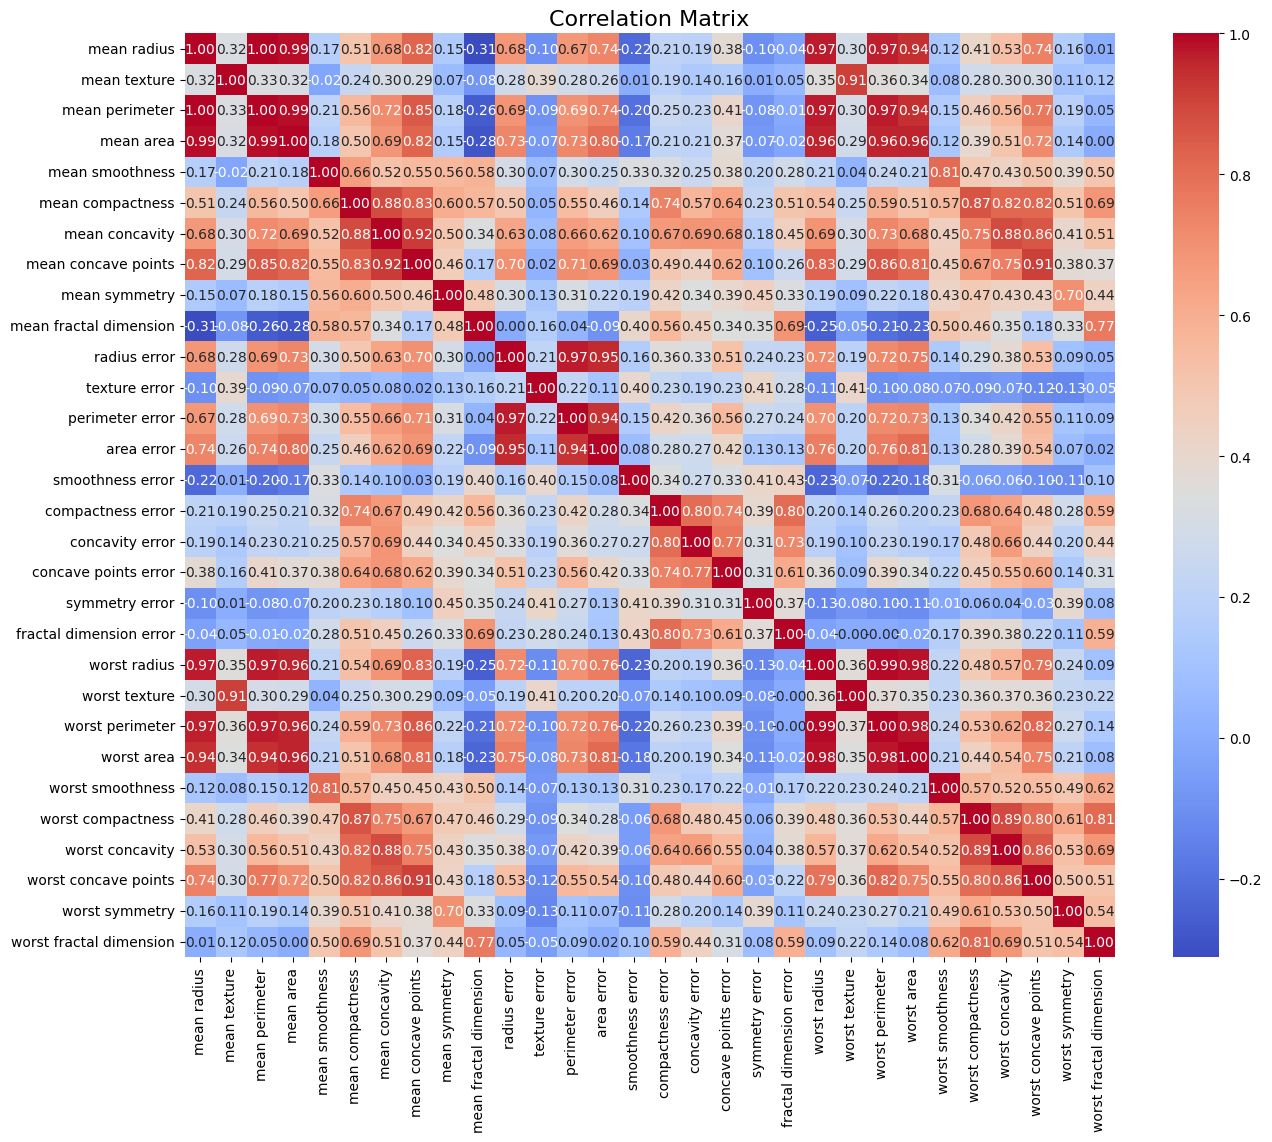

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a bigger figure size
plt.figure(figsize=(20, 15))

# Plot histograms of features
dataset.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8)
plt.tight_layout()  # Adjust layout for better display
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [104]:
dataset.shape, target.shape

((569, 30), (569,))

In [105]:
print(dataset.head())
print(target.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [106]:
## Converting dataset and target to tensor

In [107]:
type(dataset), type(target)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [108]:
from sklearn.preprocessing import StandardScaler

# Perform normalization using StandardScaler from scikit-learn
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

In [109]:
dataset = torch.tensor(dataset)

In [110]:
target = torch.tensor(target.values)

In [111]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test, target_train, target_test = train_test_split(dataset,
                                                                          target,
                                                                          test_size=0.2,
                                                                          random_state=5)



In [112]:
len(dataset_train), len(dataset_test) , len(target_train), len(target_test)

(455, 114, 455, 114)

### Building a model

In [113]:
from torch import nn

# make flexible device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [114]:
dataset_train, len(dataset_train)

(tensor([[-0.2634, -0.8074, -0.3254,  ..., -1.3644, -0.4040, -0.0053],
         [-0.7860, -0.4002, -0.8023,  ..., -0.4207,  0.1169, -0.3600],
         [ 1.1226,  0.5935,  1.0475,  ..., -0.3471, -0.8603, -1.0178],
         ...,
         [ 1.0743,  0.4027,  1.3358,  ...,  1.2454,  0.5569,  1.9869],
         [ 0.4694,  0.8425,  0.5656,  ...,  1.3520,  0.6038,  2.2861],
         [-1.2074, -0.4700, -1.1965,  ..., -0.8942,  0.1428, -0.5622]],
        dtype=torch.float64),
 455)

In [115]:
dataset_train.shape

torch.Size([455, 30])

In [116]:
from sklearn import datasets

class BreastCancerModelV0(nn.Module):
  def __init__(self):
    super().__init__
    self.layer_1 = nn.Linear(in_features=30,out_features=32) #hidden layer
    self.layer_2 = nn.Linear(in_features=32,out_features=1) # output layer

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> Layer 1 -> Layer 2 -> output


In [117]:
model_0 = nn.Sequential(
    nn.Linear(in_features=30, out_features=16),
    nn.Linear(in_features=16, out_features=1)
)

In [118]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 1.2407e-01,  1.1106e-01, -1.3827e-01,  1.1291e-02,  6.0121e-02,
                       -3.3688e-02, -1.5016e-01, -9.3882e-02,  7.4979e-02,  4.4418e-02,
                        1.5291e-01, -1.7582e-01,  1.3661e-01, -1.6213e-01,  1.7014e-01,
                       -1.7991e-01, -5.0081e-02, -2.9327e-02,  5.2725e-02, -1.7895e-01,
                        3.3777e-02,  1.6910e-01,  7.1481e-02,  1.5178e-01,  1.9112e-02,
                       -9.6987e-02, -6.3451e-02, -1.7483e-02,  7.3745e-02,  4.6507e-02],
                      [-1.4806e-01,  1.2871e-01, -5.2127e-02,  9.0999e-02, -5.1872e-02,
                        1.6523e-02,  1.1580e-01, -1.6174e-01, -1.6075e-02, -1.7589e-01,
                        3.1188e-02,  5.9153e-02, -1.7680e-01,  1.1273e-02,  1.4812e-01,
                        3.6925e-02,  3.9139e-02,  5.3847e-03,  9.6920e-02,  1.5865e-02,
                       -4.4776e-02, -7.0981e-02,  6.4675e-02, -4.3762e-02, -9.4000e-02,
     

In [119]:
with torch.inference_mode():
  dataset_test = dataset_test.to(device)
  # Convert the input tensor to the same data type as the model parameters
  dataset_test = dataset_test.type_as(next(model_0.parameters()))
  untrained_preds = model_0(dataset_test)

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(dataset_test)}, Shape: {dataset_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{target_test[:10]}")

Length of predictions: 114, Shape: torch.Size([114, 1])
Length of test samples: 114, Shape: torch.Size([114, 30])

First 10 predictions:
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [-0.],
        [1.],
        [-0.],
        [-0.],
        [-0.],
        [0.]])

First 10 labels:
tensor([0, 1, 1, 1, 1, 0, 1, 1, 1, 1])


In [120]:
dataset_test[:10], target_test[:10]

(tensor([[ 3.3307e-01,  1.3917e+00,  4.2965e-01,  2.2045e-01,  8.4258e-01,
           1.2387e+00,  9.9813e-01,  9.9541e-01,  4.1760e-01,  3.6892e-01,
           1.2209e-01, -3.7167e-01,  3.1283e-01,  6.9590e-02, -6.0268e-01,
           2.8458e-01,  1.2819e-01, -1.5672e-01, -3.4656e-01, -3.1316e-01,
           8.2850e-01,  1.7966e+00,  1.2522e+00,  6.8280e-01,  1.3910e+00,
           2.2693e+00,  1.7334e+00,  1.3368e+00,  1.8220e+00,  8.2094e-01],
         [-5.0762e-01,  6.8191e-01, -4.9919e-01, -5.4149e-01,  3.4442e-01,
          -5.3841e-02, -4.4067e-01, -5.3391e-01, -9.5150e-01,  6.8221e-01,
          -3.9800e-01,  7.9676e-01, -4.5100e-01, -4.1335e-01,  1.4331e+00,
           3.5053e-01, -2.1344e-02, -7.2368e-02, -2.1217e-01,  5.8746e-01,
          -5.5688e-01,  4.8898e-01, -5.9277e-01, -5.7586e-01,  5.6248e-01,
          -1.3019e-01, -4.9601e-01, -4.9740e-01, -1.0237e+00,  3.8094e-01],
         [ 1.0585e-01, -1.9547e+00,  9.5189e-02, -4.0355e-02,  9.7779e-01,
           1.0535e-01, 

## Setup loss function and optimizer

In [121]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.01)

In [122]:
# Calculate accuracy

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### Train the model

In [123]:
# view first 5 outputs of the forward pass on th etest dataset

model_0.eval()
with torch.inference_mode():
  # forward pass, return output before activation function is applied
  y_logits = model_0(dataset_test.to(device))[:5]

y_logits

tensor([[ 0.3095],
        [ 0.0448],
        [ 0.0481],
        [ 0.0597],
        [-0.1722]])

In [124]:
target_test[:5]

tensor([0, 1, 1, 1, 1])

In [125]:
# sigmoid activation is applied to y_logits
y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.5768],
        [0.5112],
        [0.5120],
        [0.5149],
        [0.4571]])

In [126]:
# probability using sigmoid activation
y_preds_with_activation_fn = torch.round(y_pred_prob)

with torch.inference_mode():
  # rounding the probability without using activation function
  y_preds_no_activation_fn = torch.round(torch.sigmoid(model_0(dataset_test.to(device))[:5]))

# check for equality
print(torch.eq(y_preds_with_activation_fn.squeeze(), y_preds_no_activation_fn.squeeze()))

#y_preds.squeeze()


tensor([True, True, True, True, True])


## Building training and testing loop

In [127]:
torch.manual_seed(69)
torch.cuda.manual_seed(69)

epochs = 1000

X_train, y_train = dataset_train.to(device), target_train.to(device)
X_test, y_test = dataset_test.to(device), target_test.to(device)

# Training and evaluation loop

for epoch in range(epochs):

  ### Training
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train.float()).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss
  loss = loss_fn(y_logits, y_train.float())
  # nn.BCEWuthLogitsLoss expect logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Backprop
  loss.backward()

  # Optimizer
  optimizer.step()


  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_0(X_test.float()).squeeze()
    test_pred = torch.round(torch.sigmoid(y_test))

    # Loss
    test_loss = loss_fn(test_logits,
                        y_test.float())
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
  if epoch%10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}5 | Test loss: {test_loss:.5}")


Epoch: 0 | Loss: 0.78620, Accuracy: 36.485 | Test loss: 0.64644
Epoch: 10 | Loss: 0.17218, Accuracy: 93.635 | Test loss: 0.16395
Epoch: 20 | Loss: 0.08032, Accuracy: 97.585 | Test loss: 0.10073
Epoch: 30 | Loss: 0.06019, Accuracy: 98.245 | Test loss: 0.099439
Epoch: 40 | Loss: 0.05117, Accuracy: 98.465 | Test loss: 0.11105
Epoch: 50 | Loss: 0.04706, Accuracy: 98.245 | Test loss: 0.11587
Epoch: 60 | Loss: 0.04419, Accuracy: 98.465 | Test loss: 0.11684
Epoch: 70 | Loss: 0.04199, Accuracy: 98.465 | Test loss: 0.1209
Epoch: 80 | Loss: 0.04007, Accuracy: 98.685 | Test loss: 0.12313
Epoch: 90 | Loss: 0.03830, Accuracy: 98.905 | Test loss: 0.12571
Epoch: 100 | Loss: 0.03665, Accuracy: 98.905 | Test loss: 0.12775
Epoch: 110 | Loss: 0.03508, Accuracy: 98.905 | Test loss: 0.13242
Epoch: 120 | Loss: 0.03357, Accuracy: 98.905 | Test loss: 0.14244
Epoch: 130 | Loss: 0.03212, Accuracy: 98.905 | Test loss: 0.15836
Epoch: 140 | Loss: 0.03073, Accuracy: 99.345 | Test loss: 0.17616
Epoch: 150 | Loss: 0.

### Saving model

In [129]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "breast_cancer_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/breast_cancer_model_0.pth
